In [1]:
import os
import numpy as np
import tifffile
from natsort import natsorted
import matplotlib.pyplot as plt
import pandas as pd

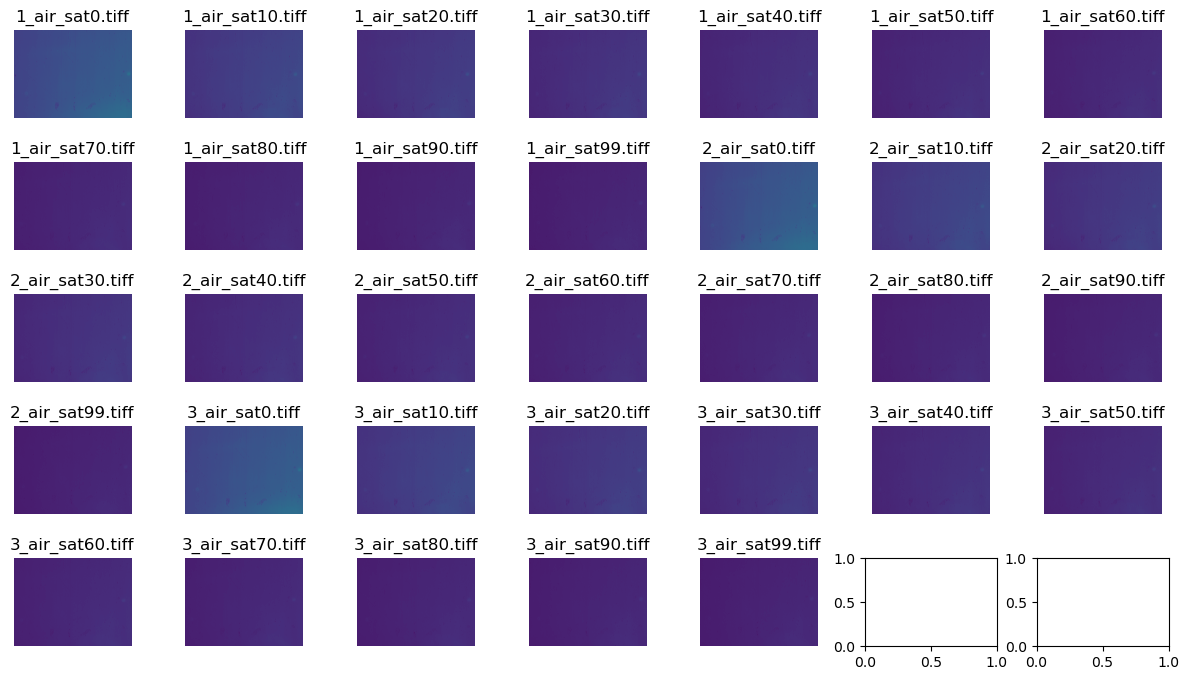

In [2]:
# Set the path to the input directory
input_dir = "D:/RAW_2023-12-12(25,3)/"

# Get a list of all image files in the input directory
input_files = [f for f in os.listdir(input_dir) if f.endswith('.tiff')]
input_files = natsorted(input_files)


# Calculate the number of rows and columns for the grid
num_images = len(input_files)
num_rows = int(num_images**0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Iterate over the image files and display them in the grid
for i, filename in enumerate(input_files):
    # Load the image
    image = tifffile.imread(os.path.join(input_dir, filename))

    # Determine the subplot indices
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the image in the corresponding subplot
    axes[row_idx, col_idx].imshow(image, vmin=256,vmax=4065)
    axes[row_idx, col_idx].set_title(filename[15:])
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Display the grid of images
plt.show()



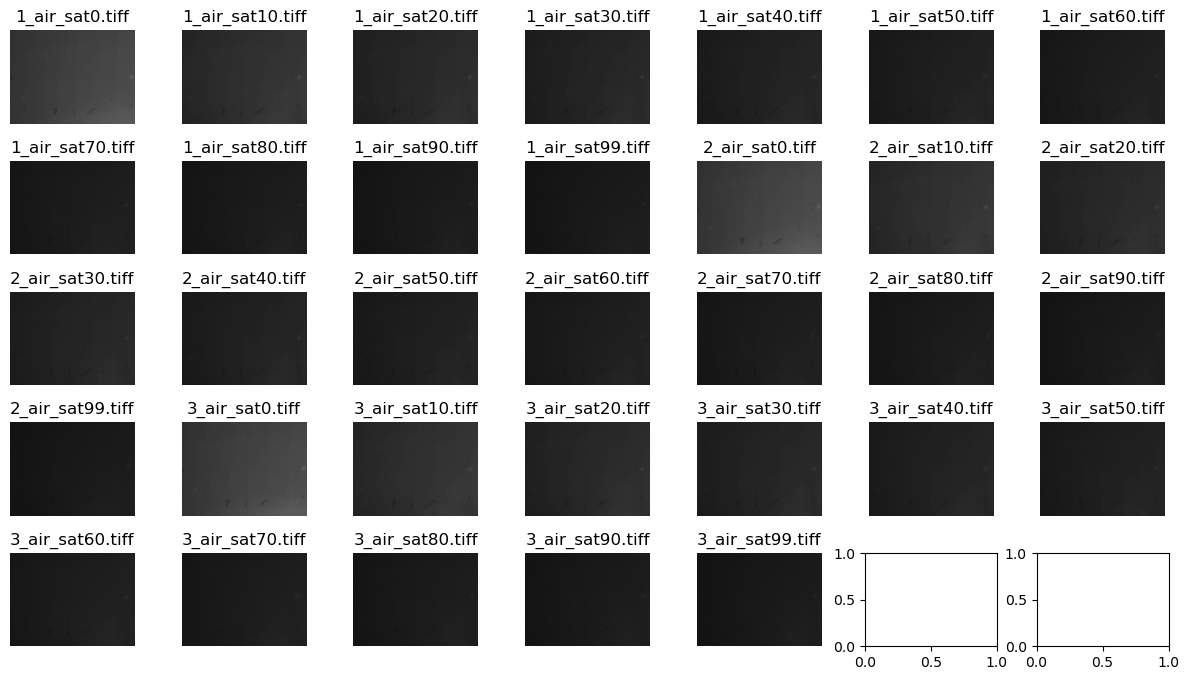

In [3]:
# Define the threshold value
threshold_value = 256

# Create a list to store the thresholded images
thresholded_images = []

# Calculate the number of rows and columns for the grid
num_images = len(input_files)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))

# Iterate over the image files and display them in the grid
for i, filename in enumerate(input_files):
    # Load the image
    image = tifffile.imread(os.path.join(input_dir, filename))

    # Apply the threshold
    thresholded_image = np.where(image > threshold_value, image, 0)
    thresholded_image_nan = np.where(thresholded_image == 0, np.nan, thresholded_image)

    thresholded_images.append(thresholded_image_nan)

    # Determine the subplot indices
    row_idx = i // num_cols
    col_idx = i % num_cols

    # Display the thresholded image in the corresponding subplot
    axes[row_idx, col_idx].imshow(thresholded_image, cmap='gray', vmin=256,vmax=4065)
    axes[row_idx, col_idx].set_title(filename[15:])
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Display the grid of images
plt.show()


In [4]:
# Set output directory
output_dir = "D:/RAW_2023-12-12(25,3)/Threshold_images"

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Save Thresholded images
for i, filename in enumerate(input_files):
    output_path = os.path.join(output_dir, filename)
    tifffile.imwrite(output_path, thresholded_images[i])

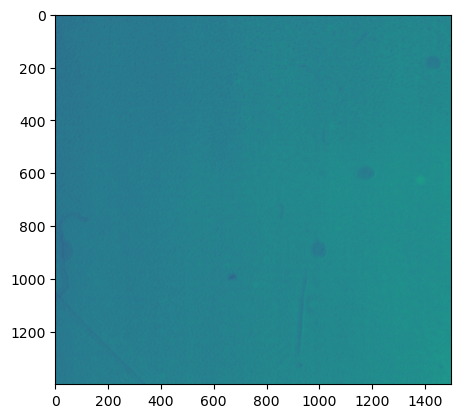

In [5]:
# Set the path to the directory containing the thresholded images
thresholded_dir = 'D:/RAW_2023-12-12(25,3)/Threshold_images/'

# Get a list of all thresholded image files in the directory
thresholded_files = [f for f in os.listdir(thresholded_dir) if f.endswith('.tiff')]
thresholded_files = natsorted(thresholded_files)

test_thresholded_image = tifffile.imread(os.path.join(thresholded_dir,thresholded_files[10]))
test_thresholded_image = test_thresholded_image[0:1400,0:1500] 
plt.imshow(test_thresholded_image)

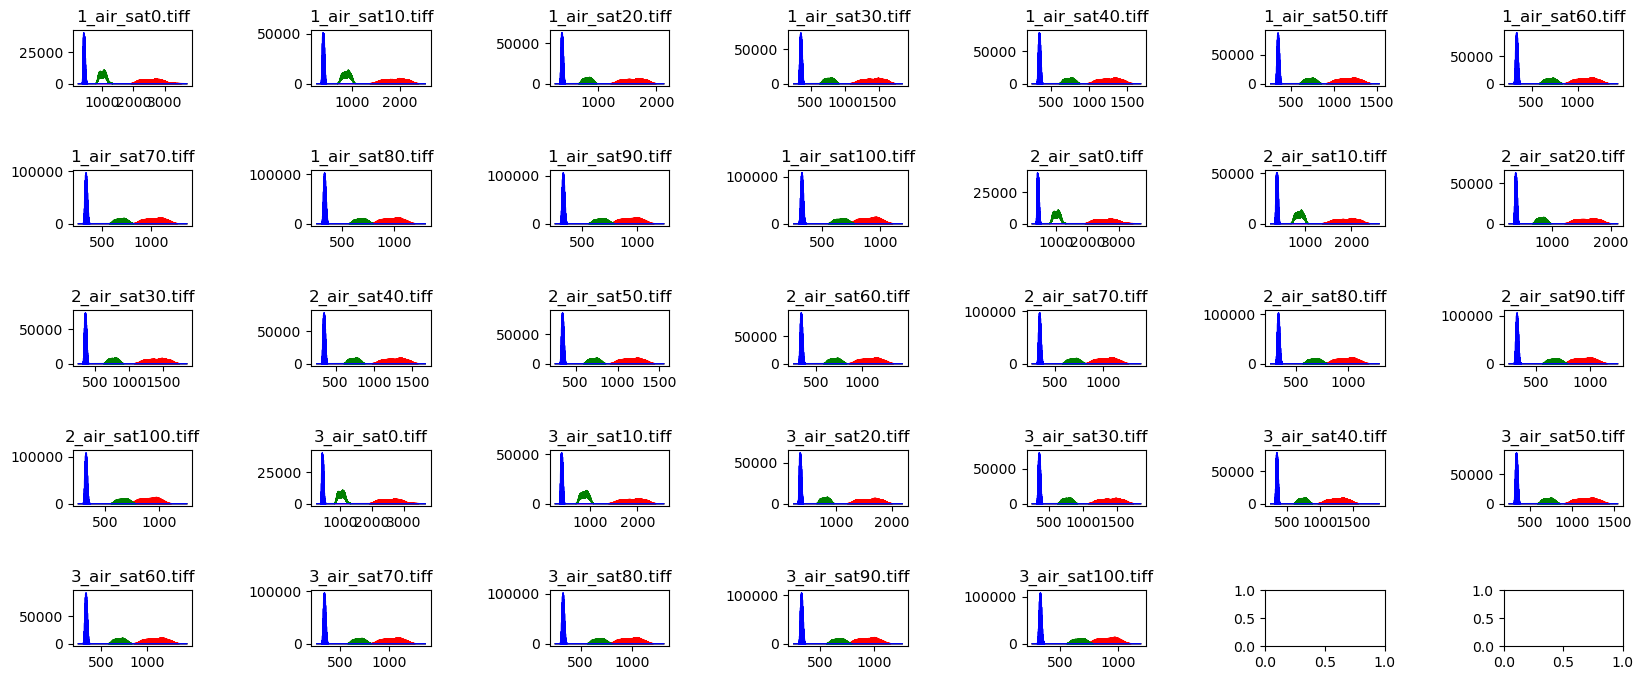

In [21]:
# Calculate the number of rows and columns for the grid
num_images = len(thresholded_files)
num_rows = int(num_images ** 0.5)
num_cols = (num_images + num_rows - 1) // num_rows

# Create the grid of subplots for histograms
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 8))

# Iterate over the thresholded image files and display histograms in the grid
for i, filename in enumerate(thresholded_files):
    # Load the thresholded image
    thresholded_image = tifffile.imread(os.path.join(thresholded_dir, filename))

    # Set Crop dimension (OPTIONAL)
    thresholded_image =thresholded_image[0:3000,0:4000]

    # Replace NaN values with 0
    thresholded_image[np.isnan(thresholded_image)] = 0

    # Get the color channels in Bayer order (BGGR)
    red = thresholded_image[1::2, 1::2]
    green1 = thresholded_image[0::2, 1::2]
    green2 = thresholded_image[1::2, 0::2]
    green = np.add(green1, green2) / 2
    blue = thresholded_image[0::2, 0::2]

    # Calculate the minimum and maximum value of the dataset
    min_value_red = np.min(red)
    min_value_green = np.min(green)
    min_value_blue = np.min(blue)
    max_value_red = np.max(red)
    max_value_green = np.max(green)
    max_value_blue = np.max(blue)
    min_value = min(min_value_red, min_value_green, min_value_blue)
    max_value = max(max_value_red, max_value_green, max_value_blue)

   # Calculate and plot the histograms for each color channel
    if np.isfinite(min_value) and np.isfinite(max_value):
        histogram, bin_edges = np.histogram(red, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='red', linewidth=1)

        histogram, bin_edges = np.histogram(green, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='green', linewidth=1)

        histogram, bin_edges = np.histogram(blue, bins=4095, range=(threshold_value, max_value))
        axes[i // num_cols, i % num_cols].plot(bin_edges[0:-1], histogram, color='blue', linewidth=1)

    # Set the title of the subplot as the filename
    axes[i // num_cols, i % num_cols].set_title(filename[15:])

# Adjust the spacing between subplots
plt.subplots_adjust(hspace=1.5, wspace=1)


plt.show()


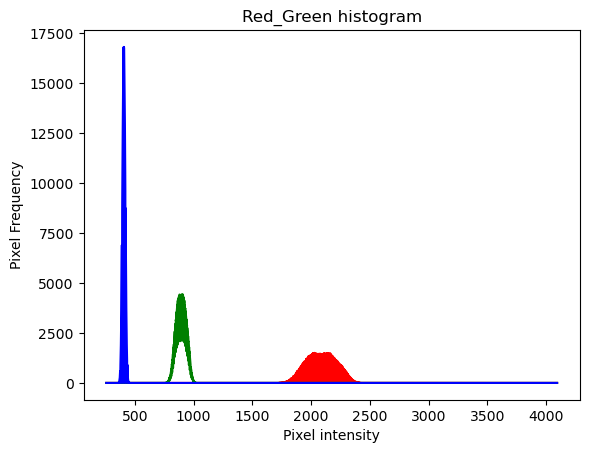

Mean value of red: 2087.257803809524
Mean value of green: 894.8421923809524
Mean value of blue: 406.5569180952381
Max value of red: 2666.0
Max value of green: 1096.5
Max value of blue 577.0
Number of red pixels: 525000
Number of green pixels: 525000
Number of blue pixels: 525000
Histogram Succes


In [8]:
# See Individual Histograms

hist_files = [f for f in os.listdir(thresholded_dir) if f.endswith('.tiff')]
hist_files = natsorted(thresholded_files)

hist_image = tifffile.imread(os.path.join(thresholded_dir,hist_files[0]))
hist_image = hist_image[0:1400,0:1500]
hist_image[np.isnan(hist_image)] = 0

#Get color channels in bayer order (BGGR)
red = hist_image[1::2,1::2]
green1 = hist_image[0::2,1::2]
green2 = hist_image[1::2,0::2]
green = np.add(green1,green2)/2
blue = hist_image[0::2,0::2]
#Make histogram for red and green channel # Set camera controls to have good pixel saturation
Colors=("red","green","blue")
Channel_ids=(red,green,blue)
for channel_id, c in zip(Channel_ids,Colors):
    histogram, bin_edges=np.histogram(channel_id,bins=4095, range=(256,4095))
    plt.plot(bin_edges[0:-1],histogram,color=c)
plt.title("Red_Green histogram")
plt.xlabel("Pixel intensity")
plt.ylabel("Pixel Frequency")
plt.show()

# Display the grid of histograms and show key values
# Calculate the minimum and maximum value of the dataset
min_value_red = np.min(red)
min_value_green = np.min(green)
min_value_blue = np.min(blue)
max_value_red = np.max(red)
max_value_green = np.max(green)
max_value_blue = np.max(blue)
min_value = min(min_value_red, min_value_green, min_value_blue)
max_value = max(max_value_red, max_value_green, max_value_blue)
#Get mean of pixel intensities for each channel
mean_red = np.mean(red)
mean_green = np.mean(green)
mean_blue = np.mean(blue)
print("Mean value of red:", mean_red)
print("Mean value of green:", mean_green)
print("Mean value of blue:", mean_blue)
#Get MAX pixel intensity for eavh channel
print("Max value of red:", max_value_red)
print("Max value of green:", max_value_green)
print("Max value of blue", max_value_blue)
# Count number of red and green pixels
num_red_pixels = np.count_nonzero(red)
num_green_pixels = np.count_nonzero(green)
num_blue_pixels =np.count_nonzero(blue)
print("Number of red pixels:", num_red_pixels)
print("Number of green pixels:", num_green_pixels)
print("Number of blue pixels:", num_blue_pixels)

print("Histogram Succes")
